### Bank Churn Model

*We are going to predict whether a customer will leave a bank based on multiple independent variables.*

In [15]:
### import the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('../data/Churn_Modelling.csv')

#### Data Exploration

In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


This is supervised learning problem - classification problem. 

In [19]:
## check for null values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
## check for duplicates

data.duplicated().sum()

0

In [21]:
### let's drop the rownumber, surname and customerId since they won't have predicted power

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [23]:
## check for inbalance in the label

data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
## Extract possible features

features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary']

label = 'Exited'

In [27]:
## Let's encode the categorical variables
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

cat_var = ['Geography', 'Gender']

for i in cat_var:
    data[i] = labelencoder.fit_transform(data[i])

In [29]:
## let's see how the data is distributed

data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
## Let's use SelectKBest to extract the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs =  SelectKBest(score_func=f_classif, k=3)
fit = fs.fit(data[features], data[label])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data[features].columns)
featureScores = pd.concat([dfscores, dfcolumns], axis=1)

featureScores.columns = ['Score', 'Specs']
featureScores

,Score,Specs
0,7.344522,CreditScore
1,12.933084,Geography
2,114.727989,Gender
3,886.063275,Age
4,1.960164,Tenure
5,142.473832,Balance
6,22.915223,NumOfProducts
7,0.509401,HasCrCard
8,249.800794,IsActiveMember
9,1.463262,EstimatedSalary


In [33]:
## The features that have a score are Age, IsActiveMember and Balance

X_selected = data[['Age', 'IsActiveMember', 'Balance']]

In [34]:
X_selected.head()

,Age,IsActiveMember,Balance
0,42,1,0.00
1,41,1,83807.86
2,42,0,159660.80
3,39,0,0.00
4,43,1,125510.82


In [153]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
## Let's scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit(X_selected)

In [38]:
## Let's deal with the imbalance

data_negative_class = data[data[label] == 0]

data_postive_class = data[data[label] == 1]


In [39]:
len(data_negative_class)

7963

In [41]:
len(data_postive_class)

2037

In [116]:
data_ =  pd.concat([data_postive_class[:1800], data_negative_class[:3500]], axis=0)
data_rem = pd.concat([data_postive_class[1800:], data_negative_class[3500:]], axis=0)

In [117]:
data_['Exited'].value_counts()

0    3500
1    1800
Name: Exited, dtype: int64

In [118]:
## Let's shuffle the data

from sklearn.utils import shuffle
data_ = shuffle(data_)

In [119]:
## The features that have a score are Age, IsActiveMember and Balance

X_selected = data_[['Age', 'IsActiveMember', 'Balance']]
y = data_['Exited']

Let's check the data distribution before we scale

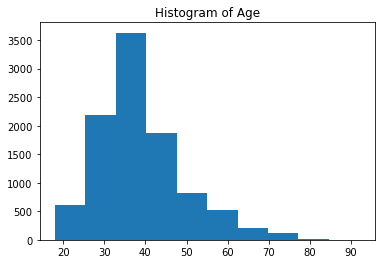

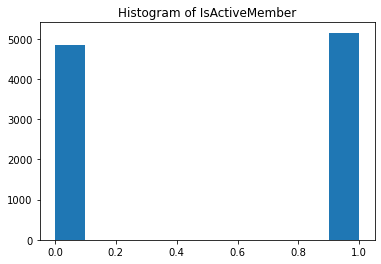

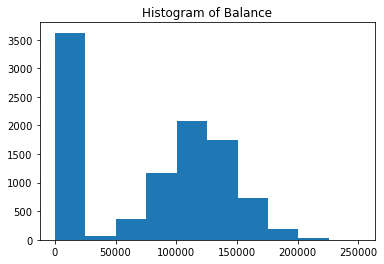

In [120]:
for i in ['Age', 'IsActiveMember', 'Balance']:
    plt.hist(data[i])
    plt.title(f'Histogram of {i}')
    plt.show()

In [121]:
##we scale using standard scaler

In [122]:
## Let's scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_selected)
X_rem_scaled = scaler.fit_transform(data_rem[['Age', 'IsActiveMember', 'Balance']])
y_rem =  data_rem['Exited']

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_scaled, y)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [124]:
predictions = model.predict(X_rem_scaled)

In [125]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_rem, predictions))

Accuracy:  0.8006382978723404


In [126]:
# Accuracy on train

print('Accuracy: ', accuracy_score(y, model.predict(X_scaled)))

Accuracy:  0.7279245283018868


In [128]:
from sklearn. metrics import classification_report

print(classification_report(y_rem, predictions))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      4463
           1       0.12      0.48      0.20       237

    accuracy                           0.80      4700
   macro avg       0.55      0.65      0.54      4700
weighted avg       0.92      0.80      0.85      4700



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

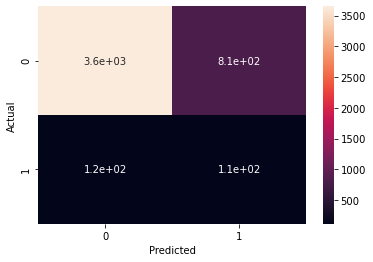

In [129]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_rem, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

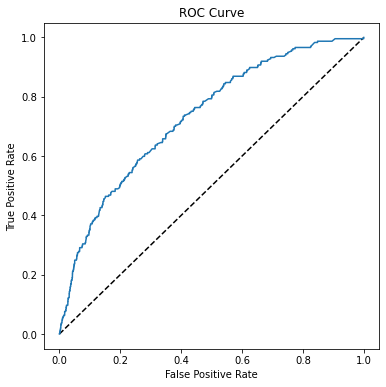

In [130]:
## Let's use an ROC curve to further visualize how well our model is performing

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_rem_scaled)[:,1]
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_rem, y_scores)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [132]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_rem,y_scores)
print('AUC: ' + str(auc))

AUC: 0.7313291375595496


The accuracy score is low maybe because of bias in our data of is there a problem with feature engineering

### Model Persistence 

In [151]:
from joblib import dump

dump(model, 'log_model.joblib')

['log_model.joblib']

### Decision Tree

In [134]:
### Let's use decision tree for feature selection and see what we get
from sklearn import tree
clf = tree.DecisionTreeClassifier()

X = data.drop('Exited', axis=1)
y = data['Exited']
clf.fit(X,y)

DecisionTreeClassifier()

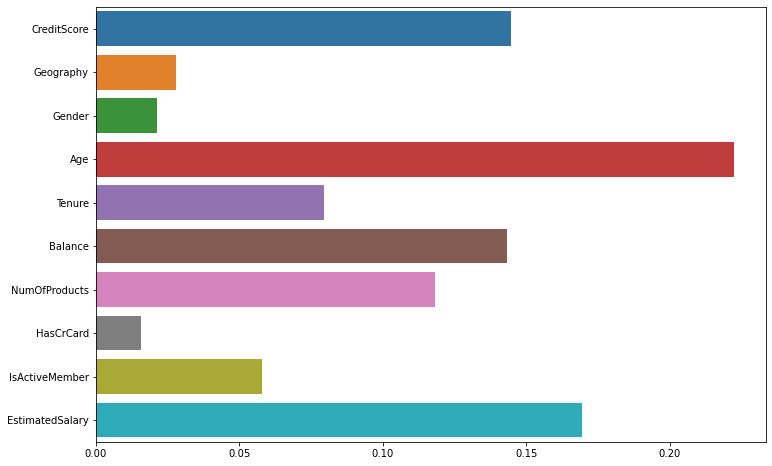

In [137]:
# feature importance


plt.figure(figsize=(12,8))

importance = clf.feature_importances_

sns.barplot(x=importance, y=X.columns)
plt.show()

In [138]:
X_selected = data_[['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                   'EstimatedSalary', 'Balance']]

In [139]:
y = data_['Exited']

In [140]:
X_rem = data_rem[['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                   'EstimatedSalary', 'Balance']]
y_rem =  data_rem['Exited']

In [144]:
# fit model on selected features
clf.fit(X_selected,y)

DecisionTreeClassifier()

In [145]:
from sklearn.tree import export_text
tree = export_text(clf)
print(tree)

|--- feature_1 <= 42.50
|   |--- feature_3 <= 2.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- feature_1 <= 37.50
|   |   |   |   |--- feature_5 <= 57593.77
|   |   |   |   |   |--- feature_1 <= 30.50
|   |   |   |   |   |   |--- feature_4 <= 197479.15
|   |   |   |   |   |   |   |--- feature_4 <= 79445.66
|   |   |   |   |   |   |   |   |--- feature_4 <= 62936.59
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 35356.66
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  35356.66
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_2 >  8.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 576.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  576.00
|   |   |   |   |   |   |   |   |   |   |   |--- class

Confusion Matrix:
 [[3463 1000]
 [ 114  123]] 

Accuracy: 0.7629787234042553

AUC: 0.6474614055936717


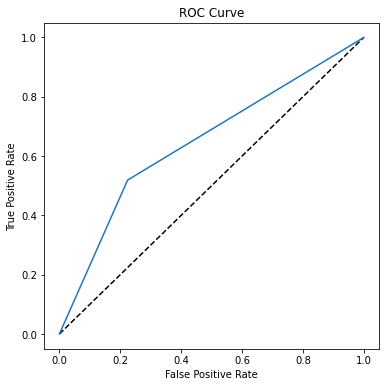

In [148]:

predictions = clf.predict(X_rem)
y_scores = clf.predict_proba(X_rem)
cm = confusion_matrix(y_rem, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_rem, predictions))
# print("Overall Precision:",precision_score(y_rem, predictions))
# print("Overall Recall:",recall_score(y_rem, predictions))
auc = roc_auc_score(y_rem,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_rem, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

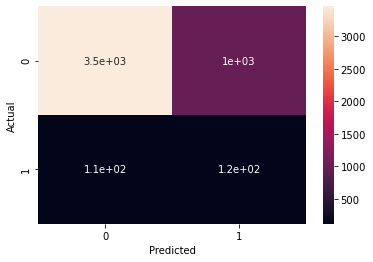

In [149]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_rem, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [150]:
from sklearn. metrics import classification_report

print(classification_report(y_rem, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      4463
           1       0.11      0.52      0.18       237

    accuracy                           0.76      4700
   macro avg       0.54      0.65      0.52      4700
weighted avg       0.92      0.76      0.83      4700

